<a href="https://colab.research.google.com/github/nandhukumar86/AIML-Practice/blob/master/Project2_BankPersonalLoanModelling_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Basic Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline


## 1. Read the column description and ensure you understand each attribute well

I have stored the file in Google Drive and used through Colabs.

In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Bank_Personal_Loan_Modelling.csv')

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [6]:
df.columns = ['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard']

In [7]:
df.dtypes

ID                     int64
Age                    int64
Experience             int64
Income                 int64
ZIPCode                int64
Family                 int64
CCAvg                float64
Education              int64
Mortgage               int64
PersonalLoan           int64
SecuritiesAccount      int64
CDAccount              int64
Online                 int64
CreditCard             int64
dtype: object

In [8]:
df.shape

(5000, 14)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


###Some Findings
1. Experience has negative value that needs to be cleaned.
2. ZIP code has some abrupt values, may be I need to consider only the first character which corresponds a particular region. 
3. Family member can be Catogical as it ranges between 1-4 But this needs to be considered as Continuous Variable.
4. Education is Catogorical variable ranges between 1-3
5. Mortgage is skewed, needs to be checked in the plot.
6. Assuming the Credit card column that everybody has Credit Card, the variables explains whether the customer uses it or not.

Checking for Negative values

In [10]:
df.query('Experience < 0').shape

(52, 14)

###There are 52 rows whose experience is negative.

In [11]:
df.query('Experience < 0')

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


Plotting Experience Vs Income

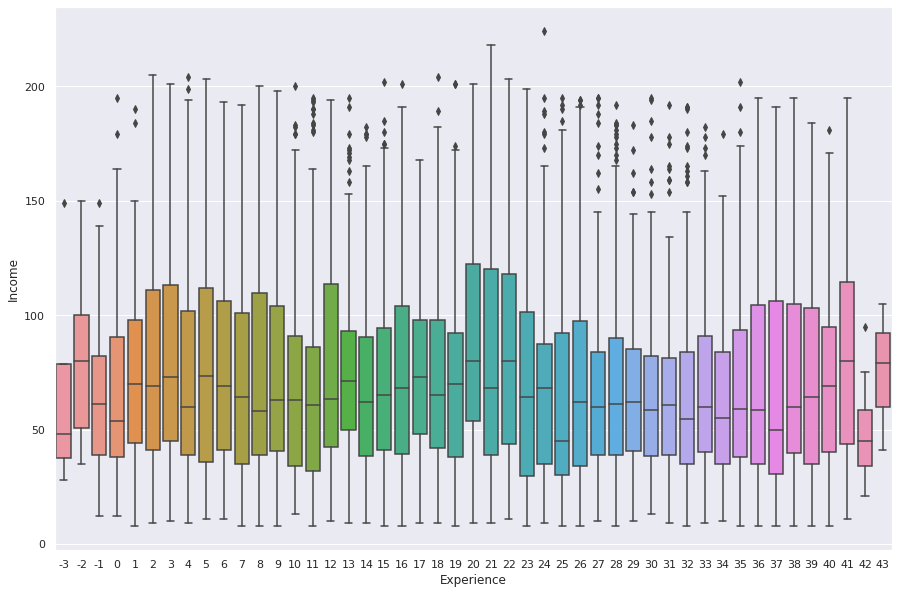

In [12]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Experience", y="Income", data=df)

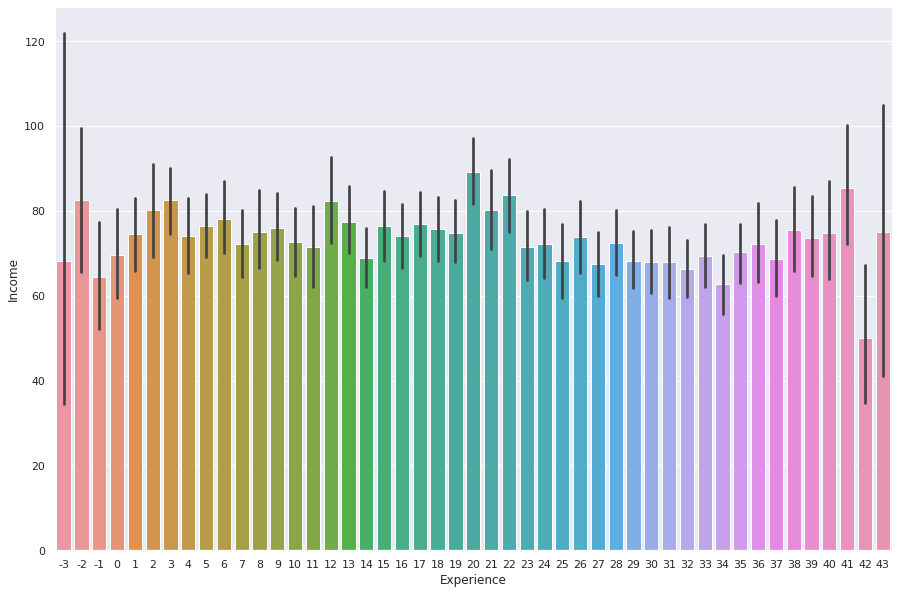

In [13]:
plt.figure(figsize=(15,10))
sns.barplot(x="Experience", y="Income", data=df)

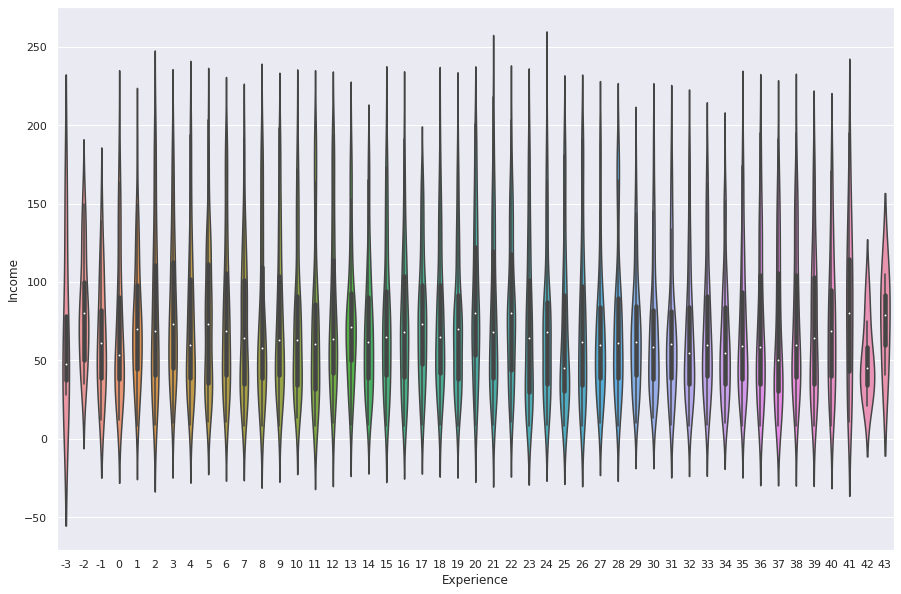

In [14]:
plt.figure(figsize=(15,10))
sns.violinplot(x="Experience", y="Income", data=df)

### Arguments
1. Experiences under -3,-2,-1 cannot be considered as 0 experience, looks like its a noise in data and might have been entered by the operator wrongly. Hence the Experience should be filled with MEAN.
2. There are skewness available in Experience 42 and 43
3. And at Experience of 21, there are no outliers availabe.

### Negative Experience Corrected in the Data

In [15]:
experience_mean = df['Experience'].mean()
f = lambda x : experience_mean if x < 0 else x

In [16]:
df['Experience'] = df['Experience'].map(f)

In [17]:
df.query('Experience < 0').size

0

### Dropping ID Column

In [18]:
df.drop(columns= ['ID'], inplace=True)

In [19]:
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1


###No Null values

In [20]:
df.isnull().sum()

Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

## 2. Study the data distribution in each attribute, share your findings

### Analyzing ZIP Code

In [21]:
df['ZIPCode'].describe()

count     5000.000000
mean     93152.503000
std       2121.852197
min       9307.000000
25%      91911.000000
50%      93437.000000
75%      94608.000000
max      96651.000000
Name: ZIPCode, dtype: float64

On looking into the ZIP Description - the first letter always starts with 9, assuming the number 9 dennotes Country, next char denotes Region and and Next char denotes Area. 

Assuming the poeple commnunity or cluster have a notion that they tend to take personal loan or not decided by the larger population in the region. We cannot leave out the ZIP Code.

Example: People in Punjab and Tamil Nadu takes Agricultural Loan comparing with Goa and Sikkim as the states are represented by ZIP Codes [I wanted to bring this into ML consideration!!]

There are some ZIP codes whose last digits were missing in the Dataset. Hence I will be diving he dataset into 7 different regions [First 2 characters] from 90 to 96.



In [22]:
df['ZIPCode'] = df['ZIPCode'].astype('str').str[0:2].astype('int')

In [23]:
df.head(2)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1.0,49,91,4,1.6,1,0,0,1,0,0,0
1,45,19.0,34,90,3,1.5,1,0,0,1,0,0,0


In [24]:
df['ZIPCode'].value_counts()

94    1472
92     988
95     815
90     703
91     565
93     417
96      40
Name: ZIPCode, dtype: int64

In [25]:
pd.crosstab(df['ZIPCode'],df['PersonalLoan']) # col1: row, col2: column, agg = 'count'
# pd.pivot_table(df, index=['col1', 'col2'], columns=['col3'], aggfunc='sum')
# pd.pivot_table(df, 'colx', index = ['col1', 'col2'], columns = ['col3'], aggfunc = 'sum')


PersonalLoan,0,1
ZIPCode,,
90,636,67
91,510,55
92,894,94
93,374,43
94,1334,138
95,735,80
96,37,3


### Personal Loan Acceptance rate is more in Region 93 [10.3%] and less in Region 96 [7.5%] where other regions stands around 9.5%  

### Exploring Mortgage

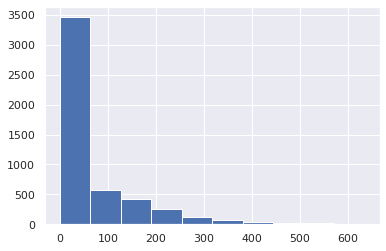

In [26]:
df['Mortgage'].hist() 

In [ ]:
df['Mortgage'].describe()

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64

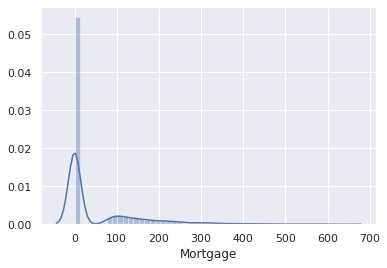

In [ ]:
sns.distplot(df['Mortgage'], kde=True)

###Mortage is Right Skewed and follows Gamma Distribution!!

In [27]:
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1.0,49,91,4,1.6,1,0,0,1,0,0,0
1,45,19.0,34,90,3,1.5,1,0,0,1,0,0,0
2,39,15.0,11,94,1,1.0,1,0,0,0,0,0,0
3,35,9.0,100,94,1,2.7,2,0,0,0,0,0,0
4,35,8.0,45,91,4,1.0,2,0,0,0,0,0,1


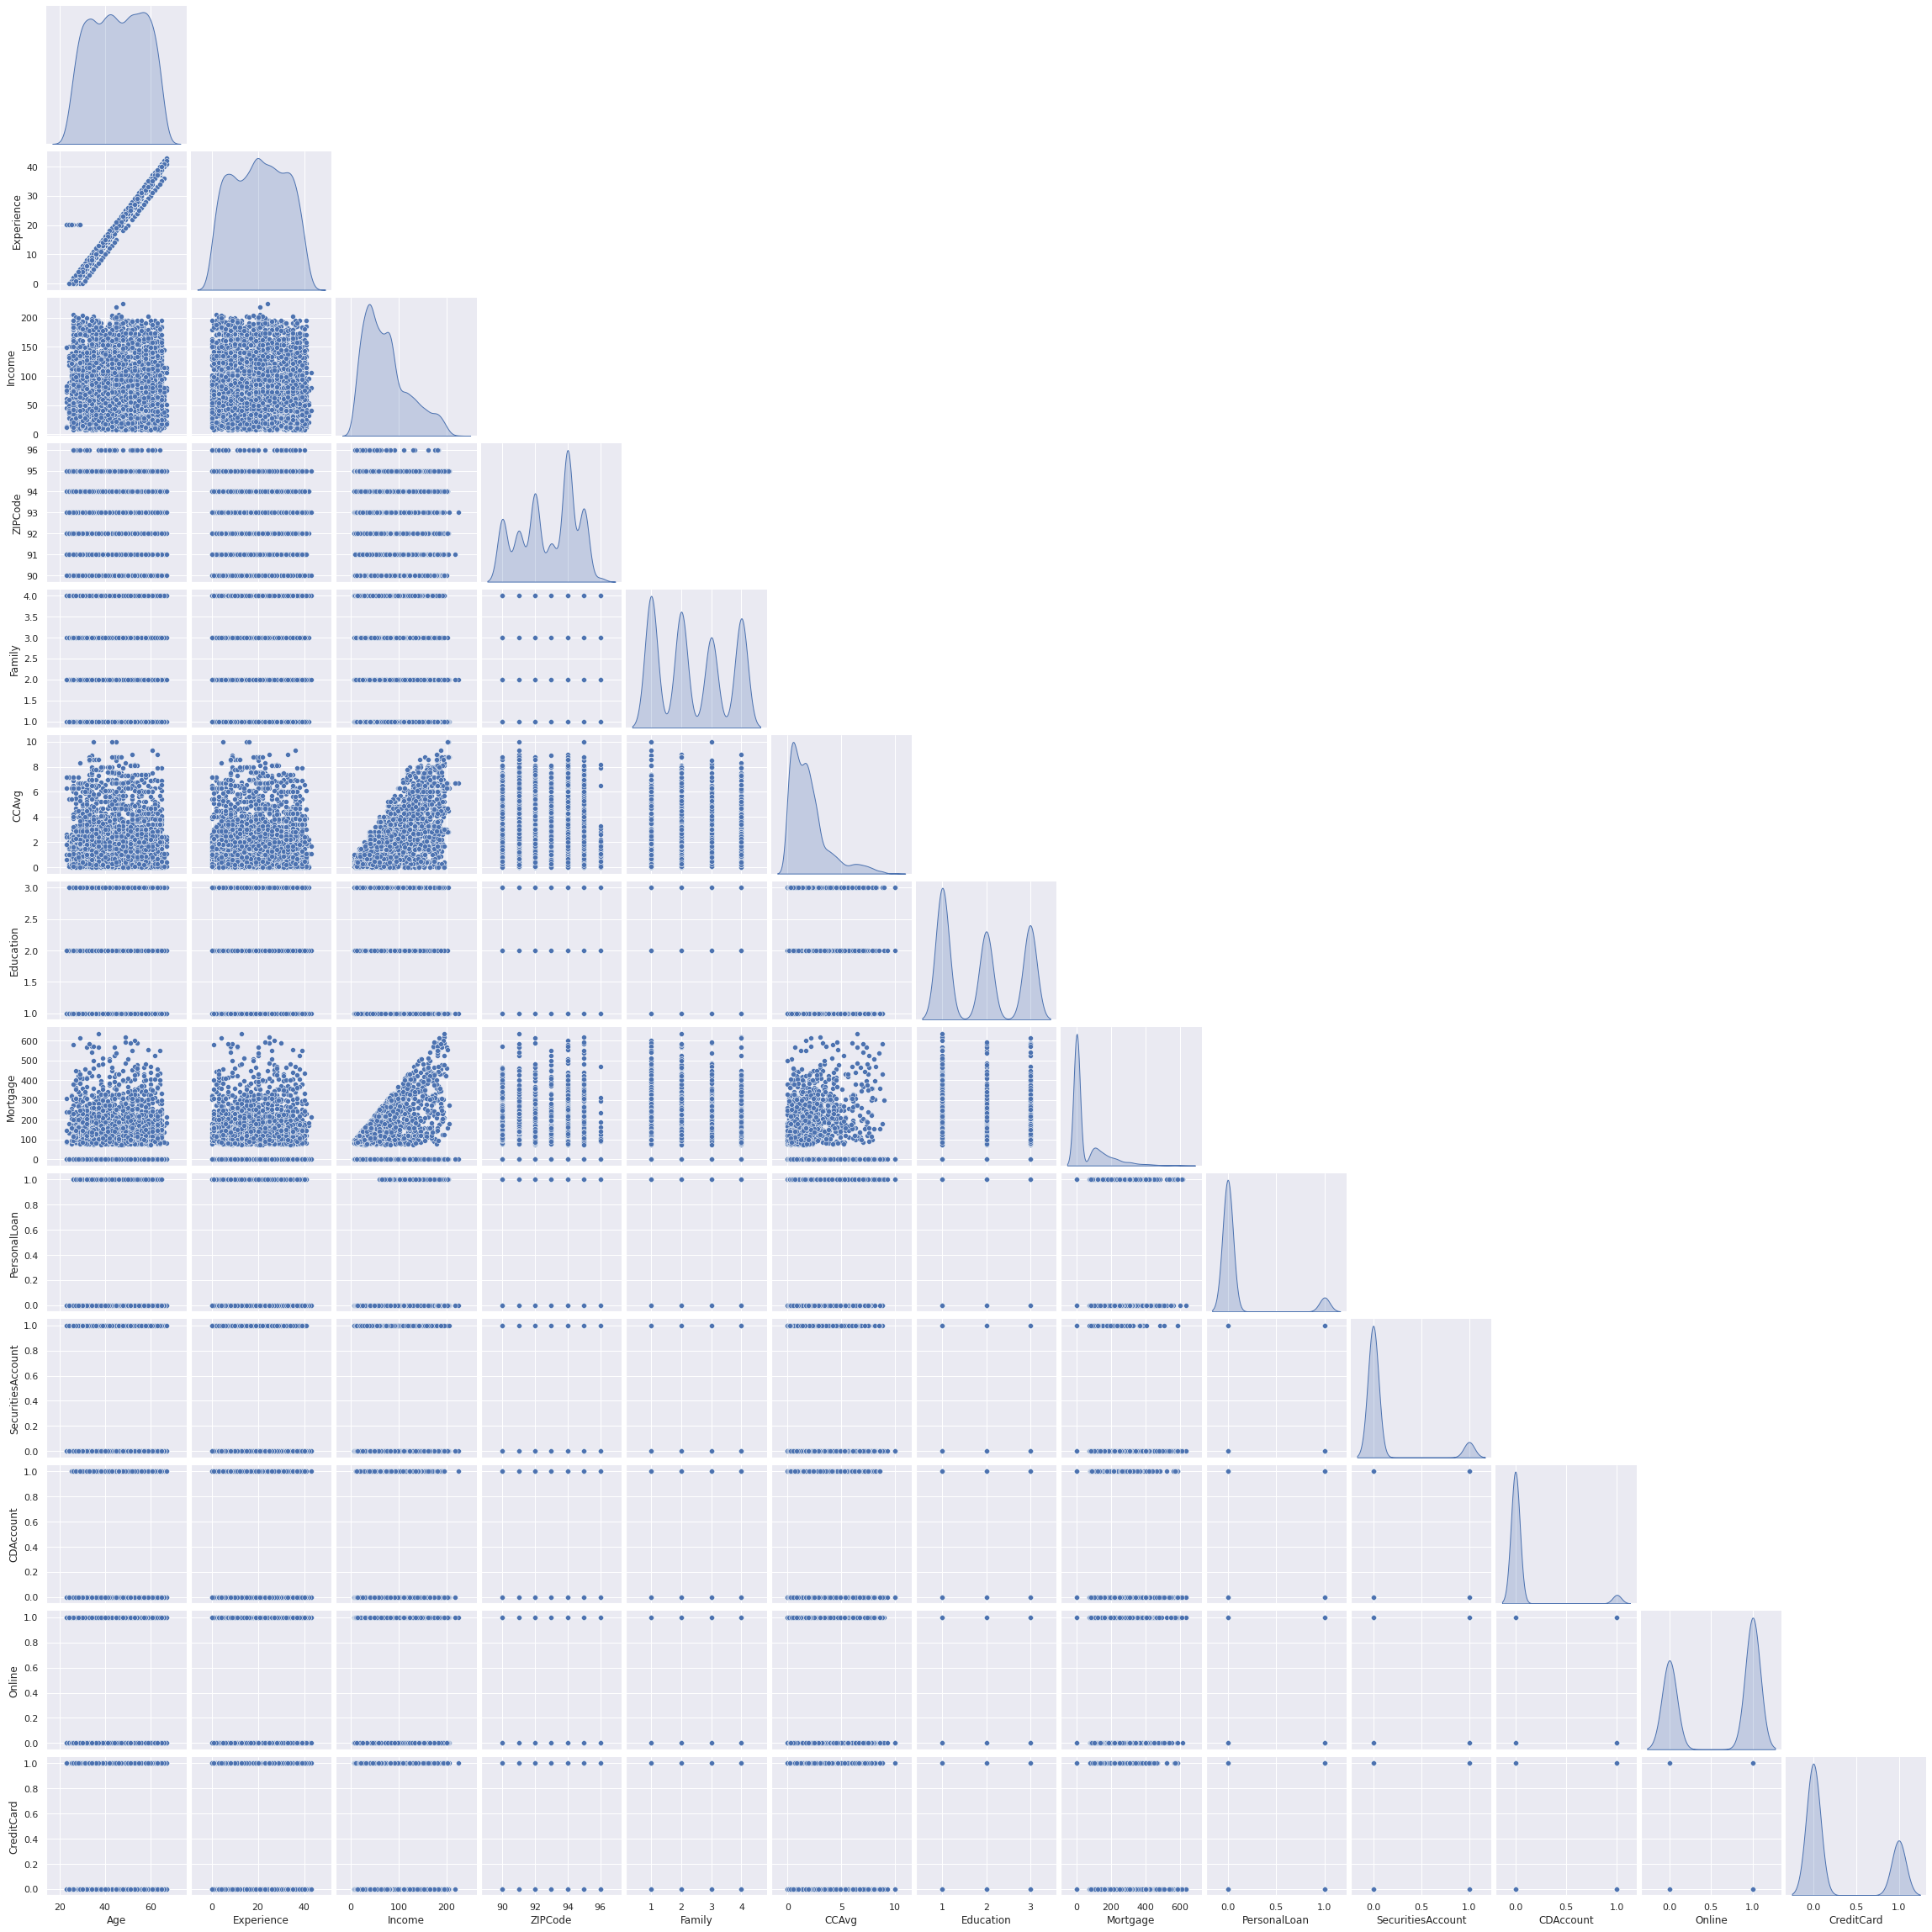

In [28]:
sns.pairplot(df, corner=True, diag_kind='kde')

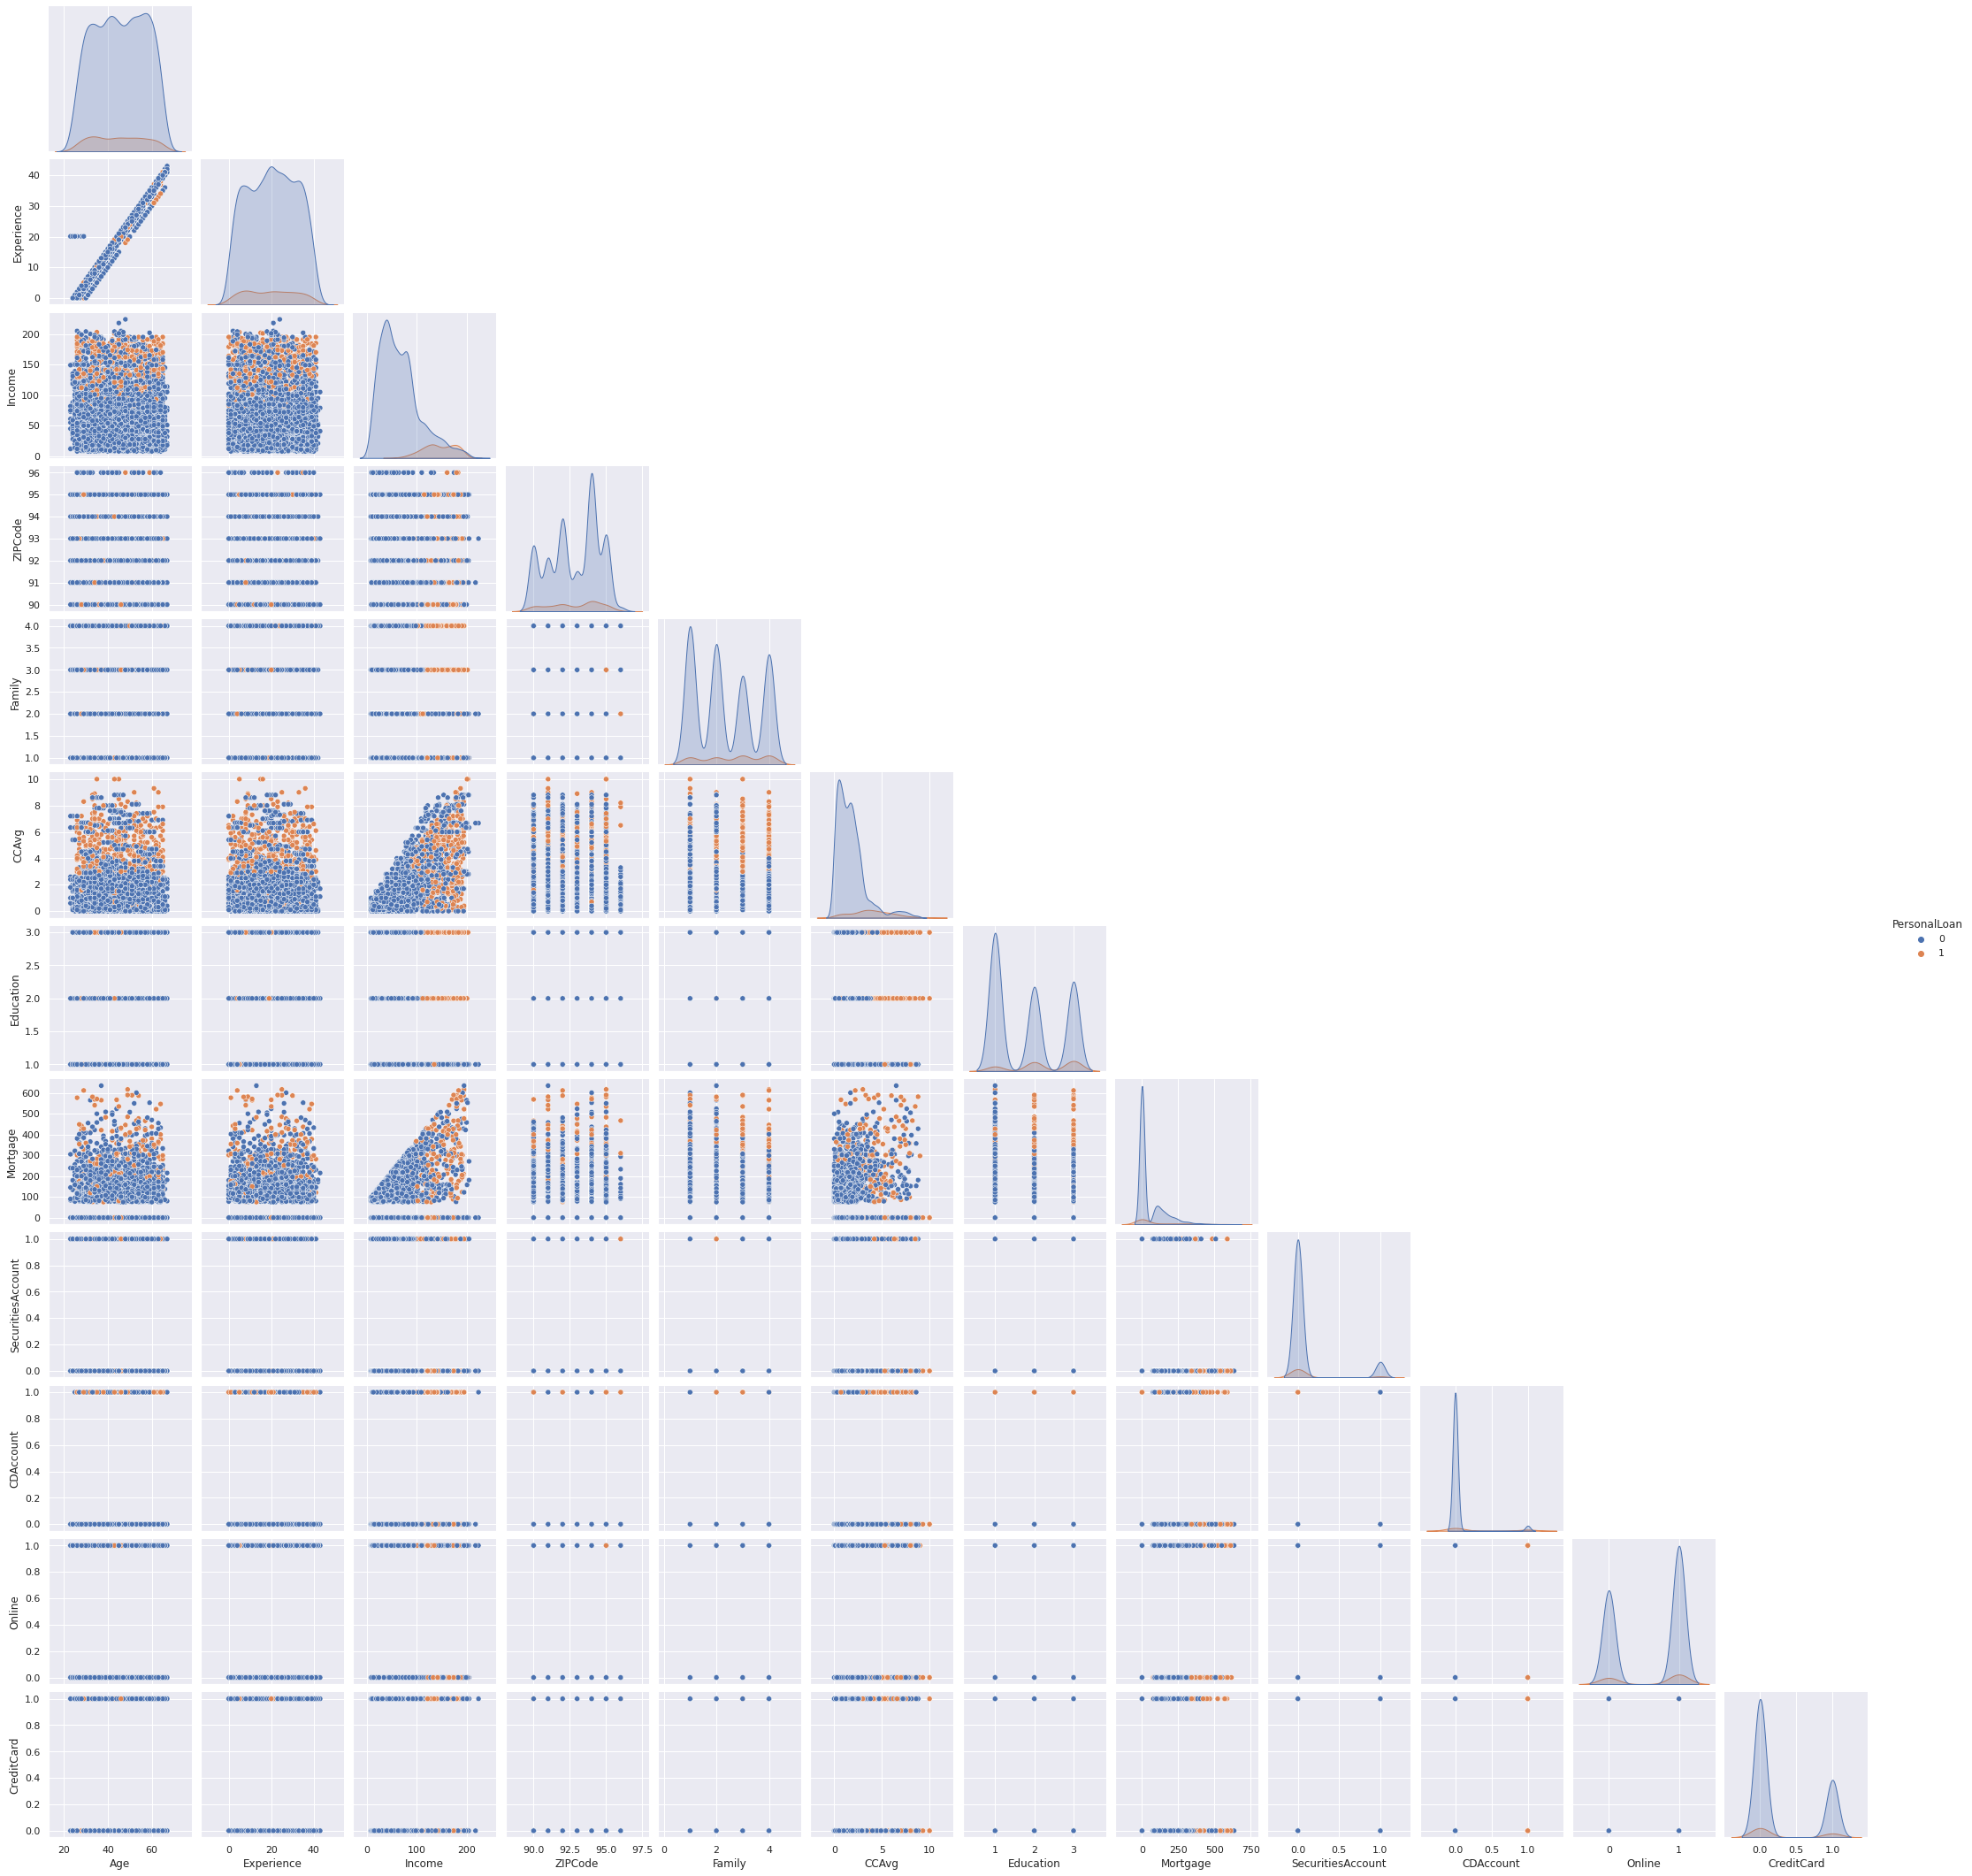

In [29]:
sns.pairplot(df, corner=True, hue = "PersonalLoan")

### Some Interesting Findings and Feature Distributions:

1. Age and Experience are normally distributed.
2. Income is bit of a right skewed. 
3. Aceptance of Personal Loan inceases when the family members increases.
4. Distribution of CC Average spent is right skewed.
5. Acceptance of personal loan increases when educational level increases.
6. Mortgage is right skewed.
7. When the customer has not Security Account then he may tends to reject the personal loan offer.
8. When the Income increases, Credit card avg. spent is also increasing.
9. When the Income increases, the Mortgages also increases and the looks like there is an upper limit for the Income range.!!
10. Most Customers with Sucurity Account or CD Account, have not accepted the loan offer.

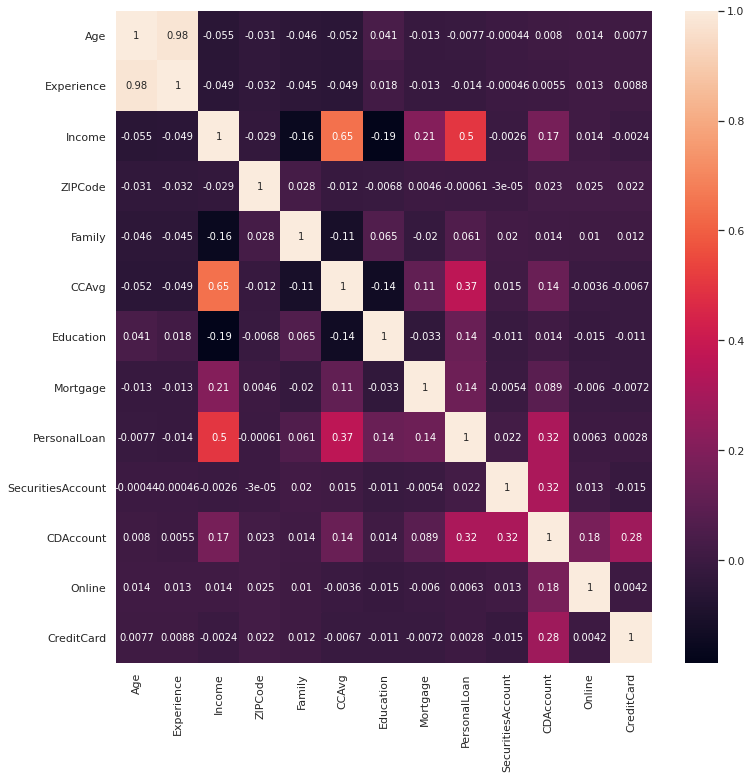

In [31]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

### Findings from heatmap.
1. Age and Experience are highly correlated, hence we can drop any of the column during model creation.
2. Income and CC Avg are some what correlated. We can assume when income increases the spend on CC Avg is also increases.

## 3. Get the target column distribution. Your comments

Findings:
1. Aceptance of Personal Loan inceases when the family members increases.
Acceptance of personal loan increases when educational level increases.
2. When the customer has not Security Account then he may tends to reject the personal loan offer.

### We are supposed to check the likelyhood of the Customer accepting the Personal Loan offer or not. Hence this is a classification problem.

The Target value/Label will be the ***Personal Loan*** column.

In [35]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

### Removing the Experience, as this is correlated with Age. More over we did corrections on regative values!!

In [39]:
features = ['Age', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard']
target = ['PersonalLoan']
X = df[features]
y = df[target]


## 4. Split the data into training and test set in the ratio of 70:30 respectively

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)


In [54]:
print(X_train.size)
print(X_test.size)
print(y_train.size)
print(y_test.size)
X_train.columns

38500
16500
3500
1500


Index(['Age', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

In [55]:
X_train.head(2)

,Age,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
4966,41,34,91,1,0.7,1,143,0,0,0,0
4086,50,11,93,4,0.2,1,0,1,0,0,0


## 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans

Without scaling the features

### Logistic Regression

#### Model

In [58]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Metrics

In [59]:
print('Training Score: ', model.score(X_train, y_train))
print('Testing Score: ', model.score(X_test, y_test))

Training Score:  0.952
Testing Score:  0.942


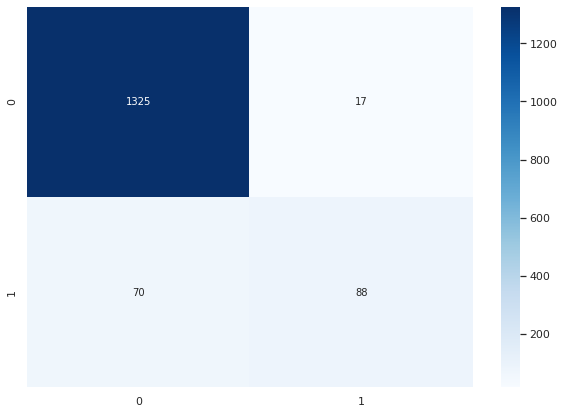

In [60]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_test_predict)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')


#### Observation
1. Variance is low between the predicted values of training set and testing set.
2. Accuracy is more than other models.

### K-Nearest Neighbor

#### Model

In [89]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 30 , weights = 'distance') # k=>sqrt(n) 
# on 30,  I got maximum trainin score

model.fit(X_train, y_train)

y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


#### Metrics

In [90]:
print('Training Score: ', model.score(X_train, y_train))
print('Testing Score: ', model.score(X_test, y_test))

Training Score:  1.0
Testing Score:  0.9066666666666666


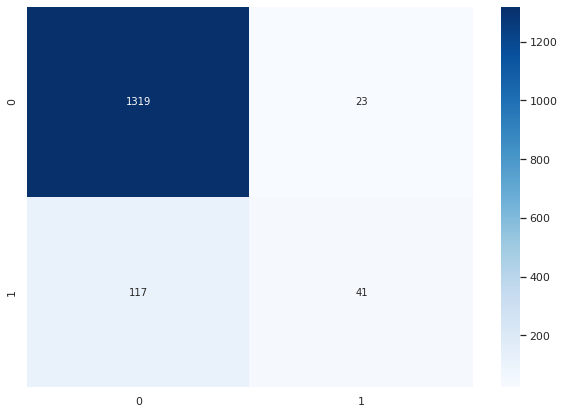

In [83]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_test_predict)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')


#### Observation
1. Variance is high between the predicted values of training set and testing set. May be an overfit for Training set.
2. Accuracy is good but not the heighest. 

### Naive Bayes

#### Model

In [84]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

model = GaussianNB() # Features are Normal, Continuous

model.fit(X_train, y_train)

y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Metrics

In [85]:
print('Training Score: ', model.score(X_train, y_train))
print('Testing Score: ', model.score(X_test, y_test))

Training Score:  0.884
Testing Score:  0.8833333333333333


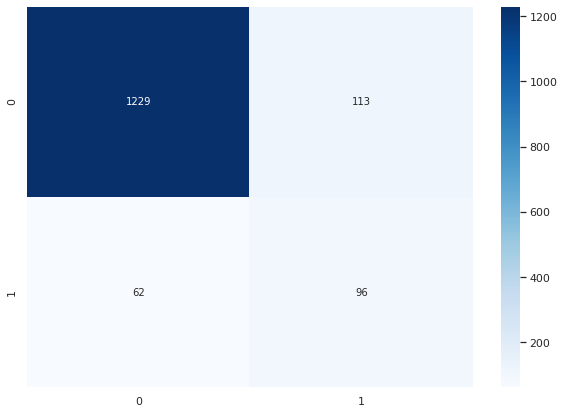

In [86]:
conf_mat = confusion_matrix(y_test, y_test_predict)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')


#### Observation
1. Variance is the least between the predicted values of training set and testing set.
2. But the accuracy is less.

### SVM

#### Model

In [104]:
from sklearn import svm

model = svm.SVC(gamma=0.025, C=3)

model.fit(X_train, y_train)

y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Metrics

In [105]:
print('Training Score: ', model.score(X_train, y_train))
print('Testing Score: ', model.score(X_test, y_test))

Training Score:  0.992
Testing Score:  0.926


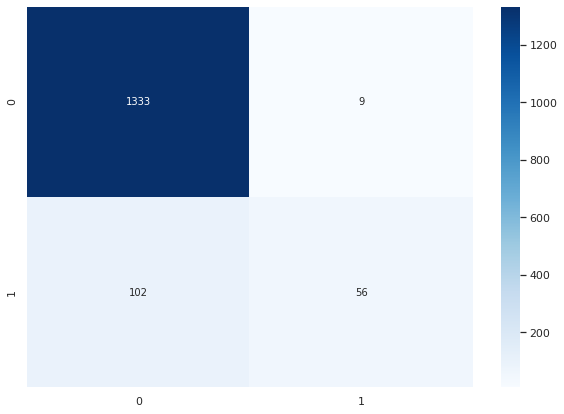

In [93]:
conf_mat = confusion_matrix(y_test, y_test_predict)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')


Scaling the features

In [106]:
from scipy.stats import zscore

X_train_scaled = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
# df['col'] = zscore(df['col'])


In [107]:
X_train_scaled.head(2)

,Age,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
4966,-0.385787,-0.860819,-1.048757,-1.238309,-0.703098,-1.051445,0.876406,-0.338075,-0.247486,-1.231331,-0.654654
4086,0.403579,-1.363244,0.119124,1.381527,-0.989435,-1.051445,-0.558751,2.957922,-0.247486,-1.231331,-0.654654


### Logistic Regression

#### Model

In [108]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train_scaled, y_train)

y_test_predict = model.predict(X_test_scaled)
y_train_predict = model.predict(X_train_scaled)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Metrics

In [110]:
print('Training Score: ', model.score(X_train_scaled, y_train))
print('Testing Score: ', model.score(X_test_scaled, y_test))

Training Score:  0.9551428571428572
Testing Score:  0.9446666666666667


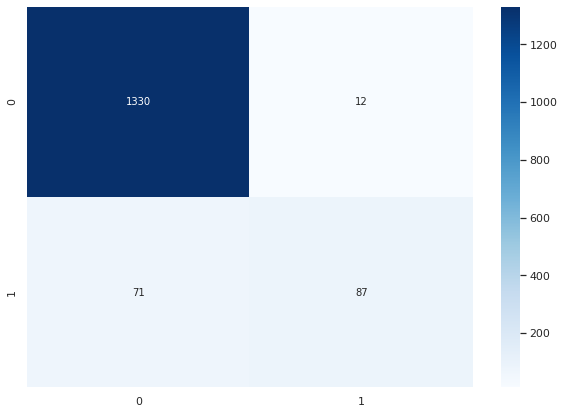

In [111]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_test_predict)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')


### K-Nearest Neighbors

#### Model

In [113]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 30 , weights = 'distance') # k=>sqrt(n)

model.fit(X_train_scaled, y_train)

y_test_predict = model.predict(X_test_scaled)
y_train_predict = model.predict(X_train_scaled)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


#### Metrics

In [116]:
print('Training Score: ', model.score(X_train_scaled, y_train))
print('Testing Score: ', model.score(X_test_scaled, y_test))

Training Score:  1.0
Testing Score:  0.9333333333333333


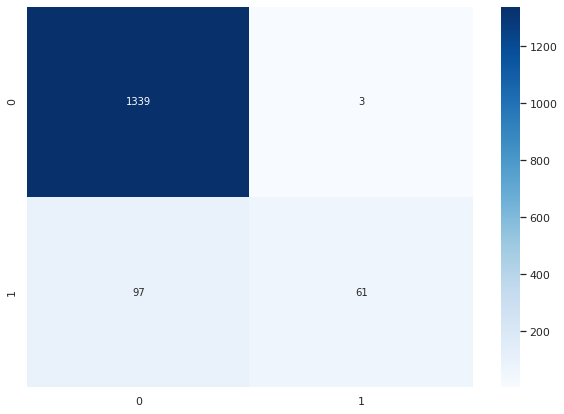

In [117]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_test_predict)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')


### SVM

#### Model

In [119]:
from sklearn import svm

model = svm.SVC(gamma=0.025, C=3)

model.fit(X_train_scaled, y_train)

y_test_predict = model.predict(X_test_scaled)
y_train_predict = model.predict(X_train_scaled)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Metrics

In [121]:
print('Training Score: ', model.score(X_train_scaled, y_train))
print('Testing Score: ', model.score(X_test_scaled, y_test))

Training Score:  0.98
Testing Score:  0.9646666666666667


#### Have not considered the Naive Bayes for feature scaling as it does not have effect on scaling

#Conclusion

#### Support Vector Machine performs the better prediction comparing all other Models given that the features are z-scaled.

#### The varience between Training score and the testing score is less, and there is neither over fit nor under fit occured in the model.

#### The second best model could be the Logistic regression after scaling.

#### Naive Bayes gives the least accurate model.